<a href="https://colab.research.google.com/github/Elignesin/SureStart/blob/main/Feb24_Housing_Prices_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Housing Prices CNN
This notebook will be used to build a basic Neural Network for predicting whether house prices are above or below the "median" price. The data for the notebook was provided by the Surestart team. This notebook is lightly modeled off of https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4 (data can also be found in this article).

In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.losses import mae, mse, binary_crossentropy
from sklearn.model_selection import train_test_split as tts
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [2]:
#We now read in the data and look at it's shape and head
data = pd.read_csv('housepricedata.csv')
print(data.shape)
print(data.head())

#We also want to convert the data into an array for ease of use
dataset = data.values

(1460, 11)
   LotArea  OverallQual  OverallCond  ...  Fireplaces  GarageArea  AboveMedianPrice
0     8450            7            5  ...           0         548                 1
1     9600            6            8  ...           1         460                 1
2    11250            7            5  ...           1         608                 1
3     9550            7            5  ...           1         642                 0
4    14260            8            5  ...           1         836                 1

[5 rows x 11 columns]


In [3]:
#Now we're going to split our X and y out of our dataset
#X will be the first 10 columns, and y will be the "median price" column

X = dataset[:,:10]
y = dataset[:,10]

In [4]:
#Next, we're going to standardize our X data
#This ensures our model won't be too heavily fit on LotArea and GarageArea, which are orders of magnitude larger than the other variables
#We'll use a min_max scaler, which scales data between 0 and 1 based on the min and max values
minmax = preprocessing.MinMaxScaler()
X_scaled = minmax.fit_transform(X)
X_scaled[:5]

array([[0.0334198 , 0.66666667, 0.5       , 0.1400982 , 0.66666667,
        0.5       , 0.375     , 0.5       , 0.        , 0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , 0.20654664, 0.66666667,
        0.        , 0.375     , 0.33333333, 0.33333333, 0.32440056],
       [0.04650728, 0.66666667, 0.5       , 0.15057283, 0.66666667,
        0.5       , 0.375     , 0.33333333, 0.33333333, 0.42877292],
       [0.03856131, 0.66666667, 0.5       , 0.12373159, 0.33333333,
        0.        , 0.375     , 0.41666667, 0.33333333, 0.45275035],
       [0.06057632, 0.77777778, 0.5       , 0.18739771, 0.66666667,
        0.5       , 0.5       , 0.58333333, 0.33333333, 0.58956276]])

In [5]:
#Split the data into training, testing, and validation datasets

#Split off the training data from the rest of the data
X_train, X_valtest, y_train, y_valtest = tts(X_scaled, y, test_size = 0.25, random_state=1693)

#Split the test and validation datasets
X_test, X_val, y_test, y_val = tts(X_valtest, y_valtest, test_size = .5, random_state=1693)

print(f"Training Set: {X_train.shape}, {y_train.shape}")
print(f"Validation Set: {X_val.shape}, {y_val.shape}")
print(f"Testing Set: {X_test.shape}, {y_test.shape}")

Training Set: (1095, 10), (1095,)
Validation Set: (183, 10), (183,)
Testing Set: (182, 10), (182,)


In [6]:
#For this neural network, we're not going to use convolutional layers (there isn't enough input data to bother here)
#Instead, we'll use 3 dense layers, getting gradually smaller

#Initialize the model
model = Sequential()
#Add first dense layer
model.add(Dense(32, activation='relu', input_shape = (10, )))
#Add second dense layer
model.add(Dense(32, activation= 'relu'))
#Add third dense layer
model.add(Dense(16, activation='relu'))
#Add output layer (using sigmoid activation because this is a binary classification)
model.add(Dense(1, activation='sigmoid'))
#Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,953
Trainable params: 1,953
Non-trainable params: 0
_________________________________________________________________


In [7]:
#We're going to choose SGD as our optimizer
opt = SGD()

#The instructions say to use mean_squared_error as the loss (but I think this should be binary crossentropy instead)

#Compile the model
model.compile(optimizer = opt, loss = 'mean_squared_error', metrics=['accuracy'])

In [8]:
#Fit the model
batch_size=32
epochs=80
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
          validation_data = (X_val, y_val))

Epoch 1/80
35/35 [==============================] - 1s 15ms/step - loss: 0.2511 - accuracy: 0.5119 - val_loss: 0.2548 - val_accuracy: 0.4536
Epoch 2/80
35/35 [==============================] - 0s 2ms/step - loss: 0.2514 - accuracy: 0.5007 - val_loss: 0.2538 - val_accuracy: 0.4536
Epoch 3/80
35/35 [==============================] - 0s 2ms/step - loss: 0.2502 - accuracy: 0.5155 - val_loss: 0.2529 - val_accuracy: 0.4536
Epoch 4/80
35/35 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.5213 - val_loss: 0.2520 - val_accuracy: 0.4536
Epoch 5/80
35/35 [==============================] - 0s 3ms/step - loss: 0.2500 - accuracy: 0.4878 - val_loss: 0.2511 - val_accuracy: 0.4536
Epoch 6/80
35/35 [==============================] - 0s 2ms/step - loss: 0.2486 - accuracy: 0.5085 - val_loss: 0.2503 - val_accuracy: 0.4536
Epoch 7/80
35/35 [==============================] - 0s 2ms/step - loss: 0.2484 - accuracy: 0.5144 - val_loss: 0.2497 - val_accuracy: 0.4536
Epoch 8/80
35/35 [=

In [9]:
#Evaluate the model (return both loss and accuracy)
model.evaluate(X_test, y_test)
#We can see that the accuracy on the test set is ~90.6%

6/6 [==============================] - 0s 2ms/step - loss: 0.1230 - accuracy: 0.9066


[0.12300568073987961, 0.906593382358551]

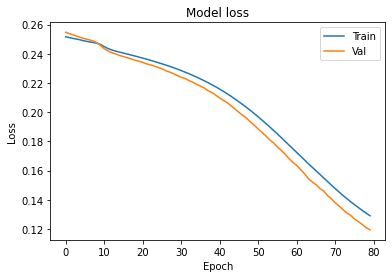

In [10]:
#Plot the training and validation loss (this is loss in Mean Squared Error, as requested)
#This code was given in the article
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

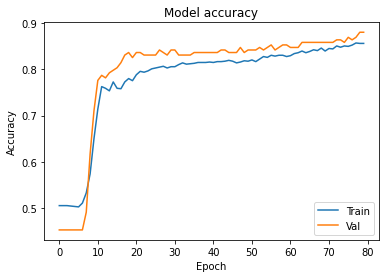

In [11]:
#Plot the training and validation accuracy
#This code was given in the article
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


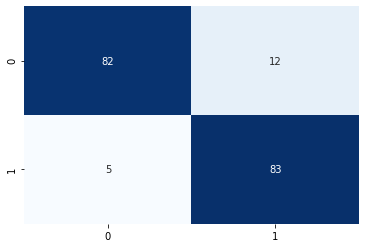

In [12]:
#Lastly, we want to look at a confusion matrix on our test dataset
y_pred = model.predict_classes(X_test)
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='Blues', cbar=False, annot=True, fmt='d');